<a href="https://colab.research.google.com/github/ThatGuyDV/CNNapproches/blob/master/flowerclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install git+https://github.com/Kaggle/kaggle-api.git --upgrade
import os
credentials = {"username":"dv1453","key":"d39e3e13f008614ac3efbcdc3f63ed52"}
os.environ['KAGGLE_USERNAME']=credentials["username"]
os.environ['KAGGLE_KEY']=credentials["key"]

  Cloning https://github.com/Kaggle/kaggle-api.git to /tmp/pip-req-build-zx89c21_
  Running command git clone -q https://github.com/Kaggle/kaggle-api.git /tmp/pip-req-build-zx89c21_
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=78385 sha256=bdd593b3d1e098bec68646148cd34273be32ccdc7c00906716cb3c9ce3dc72bf
  Stored in directory: /tmp/pip-ephem-wheel-cache-odra_tq3/wheels/2f/2c/1d/18a38a6b617c2c338bdcbf409f3ccc2452799db7dca965d475
Successfully built kaggle
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6


In [3]:
pwd

'/content'

In [4]:
!kaggle datasets download -d alxmamaev/flowers-recognition --force

 98% 441M/450M [00:02<00:00, 199MB/s]
100% 450M/450M [00:02<00:00, 195MB/s]


In [5]:
%%capture
!unzip flowers-recognition.zip

In [1]:
data_dir = '/content/flowers/flowers'

In [2]:
import os 
Labels = os.listdir(data_dir)
Labels

['rose', 'tulip', 'daisy', 'sunflower', 'dandelion']

In [3]:
import os
import torch
import torchvision
from torch.utils.data import random_split
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
from tqdm.notebook import tqdm

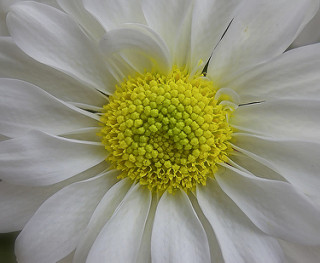

(320, 263)


In [6]:
image_file = '/content/flowers/flowers/daisy/100080576_f52e8ee070_n.jpg'
img = Image.open(image_file)
display(img)
print(img.size)

In [7]:
trans =transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(0.3),
    transforms.CenterCrop(256),
    transforms.ToTensor(),
    transforms.Normalize(mean =[0.485,0.456,0.406], std = [0.229,0.224,0.225])
])

In [8]:
data = ImageFolder(data_dir, transform = trans)

In [9]:
len(data)

4323

In [14]:
data[1]

(tensor([[[ 0.0056, -0.0116, -0.0629,  ...,  0.7933,  0.8789,  0.6906],
          [ 0.1426, -0.0972, -0.1999,  ...,  0.9303,  0.8618,  0.8447],
          [ 0.3481,  0.0056, -0.0458,  ...,  0.7933,  0.8447,  0.7077],
          ...,
          [ 1.9578,  2.0434,  1.7865,  ...,  0.3994,  0.5193,  0.5193],
          [ 1.8893,  1.3413,  0.9474,  ...,  0.4679,  0.4166,  0.4166],
          [ 1.1529,  1.0502,  1.2214,  ...,  0.3652,  0.3138,  0.3652]],
 
         [[ 0.2052,  0.1877,  0.0651,  ...,  0.9405,  1.0805,  0.8880],
          [ 0.3452,  0.1001, -0.0049,  ...,  1.0980,  0.9930,  0.9755],
          [ 0.5553,  0.2052,  0.1527,  ...,  0.9230,  1.0105,  0.9055],
          ...,
          [ 2.1134,  2.2010,  1.9384,  ...,  0.5203,  0.6604,  0.6604],
          [ 2.0784,  1.5357,  1.2031,  ...,  0.5553,  0.5028,  0.4678],
          [ 1.3256,  1.2381,  1.4657,  ...,  0.5028,  0.4503,  0.5203]],
 
         [[ 0.4091,  0.4265,  0.2871,  ...,  1.2980,  1.3851,  1.1934],
          [ 0.5485,  0.3393,

In [10]:
train_size = round(0.85 * len(data))
test_size = len(data)- train_size
print('trian size:', train_size, '\n test size:', test_size)

trian size: 3675 
 test size: 648


In [11]:
train_data, test_data = random_split(data, [train_size, test_size] )

In [12]:
batch_size = 32

In [13]:
train_dl = DataLoader(train_data, shuffle= True, batch_size=batch_size)
test_dl = DataLoader(test_data, shuffle= True, batch_size=batch_size)

In [14]:
from torchvision.utils import make_grid

def show_batch(dl):
    x =[]
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        for label in labels:
          x.append(Labels[label])
        print(x)
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['daisy', 'daisy', 'daisy', 'tulip', 'rose', 'tulip', 'tulip', 'dandelion', 'rose', 'dandelion', 'tulip', 'sunflower', 'dandelion', 'tulip', 'sunflower', 'dandelion', 'dandelion', 'dandelion', 'tulip', 'tulip', 'daisy', 'tulip', 'dandelion', 'dandelion', 'tulip', 'rose', 'rose', 'rose', 'rose', 'rose', 'dandelion', 'tulip']


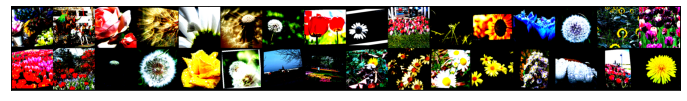

In [15]:
show_batch(train_dl)

In [16]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [17]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [18]:
class FlowerCnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 128 x 128

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 64 x 64

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 32 x 32

            nn.Flatten(), 
            nn.Linear(256*32*32, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 5))
        
    def forward(self, xb):
        return self.network(xb)

In [19]:
model = FlowerCnnModel()
model

FlowerCnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten()
    (16): Linear(in_features=262144, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_features=1024, out_feature

In [25]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([32, 3, 256, 256])
out.shape: torch.Size([32, 5])
out[0]: tensor([-0.0175,  0.0480, -0.0169, -0.0129, -0.0368], grad_fn=<SelectBackward>)


In [20]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [21]:
device = get_default_device()
device

device(type='cuda')

In [22]:
train_dl = DeviceDataLoader(train_dl, device)
test_dl = DeviceDataLoader(test_dl, device)
to_device(model, device);

In [23]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [24]:
model = to_device(FlowerCnnModel(), device)

In [31]:
evaluate(model, test_dl)

{'val_acc': 0.1800595223903656, 'val_loss': 1.612676978111267}

In [32]:
epochs = 5
lr = 0.001
opt_func = torch.optim.Adam

In [33]:
%%time
history = fit(epochs, lr, model, train_dl, test_dl, opt_func)


Epoch [0], train_loss: 1.4539, val_loss: 1.3195, val_acc: 0.4048



Epoch [1], train_loss: 1.3069, val_loss: 1.2678, val_acc: 0.4271



Epoch [2], train_loss: 1.2816, val_loss: 1.2743, val_acc: 0.4301



Epoch [3], train_loss: 1.2272, val_loss: 1.2073, val_acc: 0.4345



Epoch [4], train_loss: 1.0975, val_loss: 1.0503, val_acc: 0.6012
CPU times: user 5min 46s, sys: 3min 4s, total: 8min 51s
Wall time: 8min 55s


In [34]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

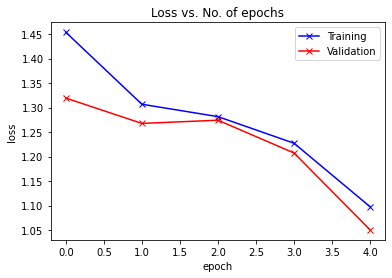

In [35]:
plot_losses(history)

In [36]:
history += fit(epochs, lr, model, train_dl, test_dl, opt_func)


Epoch [0], train_loss: 0.9867, val_loss: 1.0792, val_acc: 0.5863



Epoch [1], train_loss: 0.9182, val_loss: 1.0408, val_acc: 0.6027



Epoch [2], train_loss: 0.8481, val_loss: 0.9700, val_acc: 0.6637



Epoch [3], train_loss: 0.7544, val_loss: 0.8894, val_acc: 0.6667



Epoch [4], train_loss: 0.6780, val_loss: 0.9543, val_acc: 0.6652


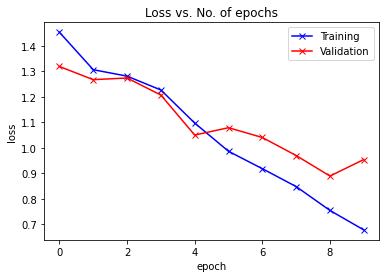

In [37]:
plot_losses(history)

In [38]:
history += fit(2, lr, model, train_dl, test_dl, opt_func)


Epoch [0], train_loss: 0.6037, val_loss: 0.9101, val_acc: 0.7113



Epoch [1], train_loss: 0.5327, val_loss: 0.9197, val_acc: 0.6890


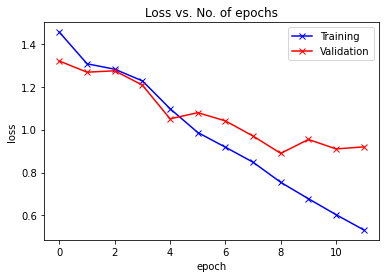

In [39]:
plot_losses(history)

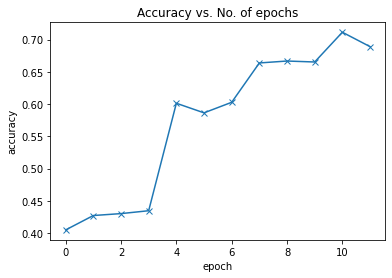

In [40]:
accuracies = [x['val_acc'] for x in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [48]:
def show_sample(img, target, invert=False):
    if invert:
        plt.imshow(1 - img.permute((1, 2, 0)))
    else:
        plt.imshow(img.permute(1, 2, 0))
    print('Labels:', Labels[target])

In [60]:
def predict_single(image):
    xb = image.unsqueeze(0)
    xb = to_device(xb, device)
    preds = model(xb)
    _,prediction = torch.max(preds, dim=1)
    print("Prediction: ", prediction)
    show_sample(image, prediction)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction:  tensor([4], device='cuda:0')
Labels: dandelion


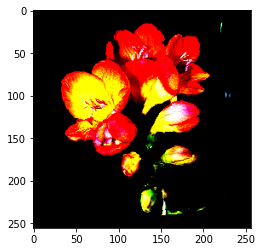

In [61]:
predict_single(test_data[100][0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction:  tensor([2], device='cuda:0')
Labels: daisy


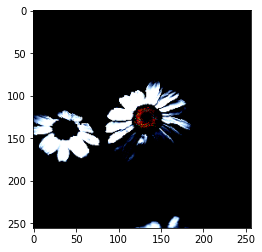

In [62]:
predict_single(test_data[500][0])

In [65]:
history += fit(2, 1e-5, model, train_dl, test_dl, opt_func)


Epoch [0], train_loss: 0.4210, val_loss: 0.9325, val_acc: 0.6667



Epoch [1], train_loss: 0.3955, val_loss: 0.9900, val_acc: 0.6935


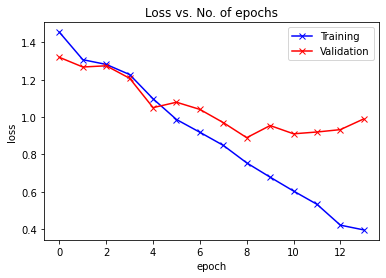

In [66]:
plot_losses(history)

In [25]:
@torch.no_grad()
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [26]:
epochs = 8
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [27]:
%%time
history1 = fit_one_cycle(epochs, max_lr, model, train_dl, test_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)


Epoch [0], train_loss: 1.3960, val_loss: 1.3789, val_acc: 0.4152



Epoch [1], train_loss: 3.2433, val_loss: 1.6037, val_acc: 0.2396



Epoch [2], train_loss: 1.6011, val_loss: 1.6020, val_acc: 0.2485



Epoch [3], train_loss: 1.5991, val_loss: 1.5991, val_acc: 0.2440



Epoch [4], train_loss: 1.5990, val_loss: 1.6019, val_acc: 0.2396



Epoch [5], train_loss: 1.5989, val_loss: 1.5999, val_acc: 0.2396



Epoch [6], train_loss: 1.5986, val_loss: 1.6045, val_acc: 0.2396



Epoch [7], train_loss: 1.5980, val_loss: 1.6017, val_acc: 0.2440
CPU times: user 9min 38s, sys: 5min 2s, total: 14min 40s
Wall time: 14min 43s
